In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/pokemon[1].csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [ ]:
df.isnull().sum()

,0
abilities,0
against_bug,0
against_dark,0
against_dragon,0
against_electric,0
against_fairy,0
against_fight,0
against_fire,0
against_flying,0
against_ghost,0


TASK 1:Offensive and Defensive Types


In [ ]:
off_deff = df.groupby('type1')[['attack', 'defense']].mean().sort_values(by='attack', ascending=False)

In [ ]:
print(off_deff)

              attack     defense
type1                           
dragon    106.407407   86.259259
fighting   99.178571   66.392857
ground     94.812500   83.906250
steel      93.083333  120.208333
rock       90.666667   96.266667
dark       87.793103   70.517241
fire       81.500000   67.788462
normal     75.161905   59.695238
grass      73.769231   70.871795
water      73.307018   73.482456
ice        73.304348   71.913043
ghost      72.740741   79.518519
poison     72.656250   70.031250
electric   70.820513   61.820513
bug        70.125000   70.847222
flying     66.666667   65.000000
psychic    65.566038   69.264151
fairy      62.111111   68.166667


<Figure size 1400x600 with 0 Axes>

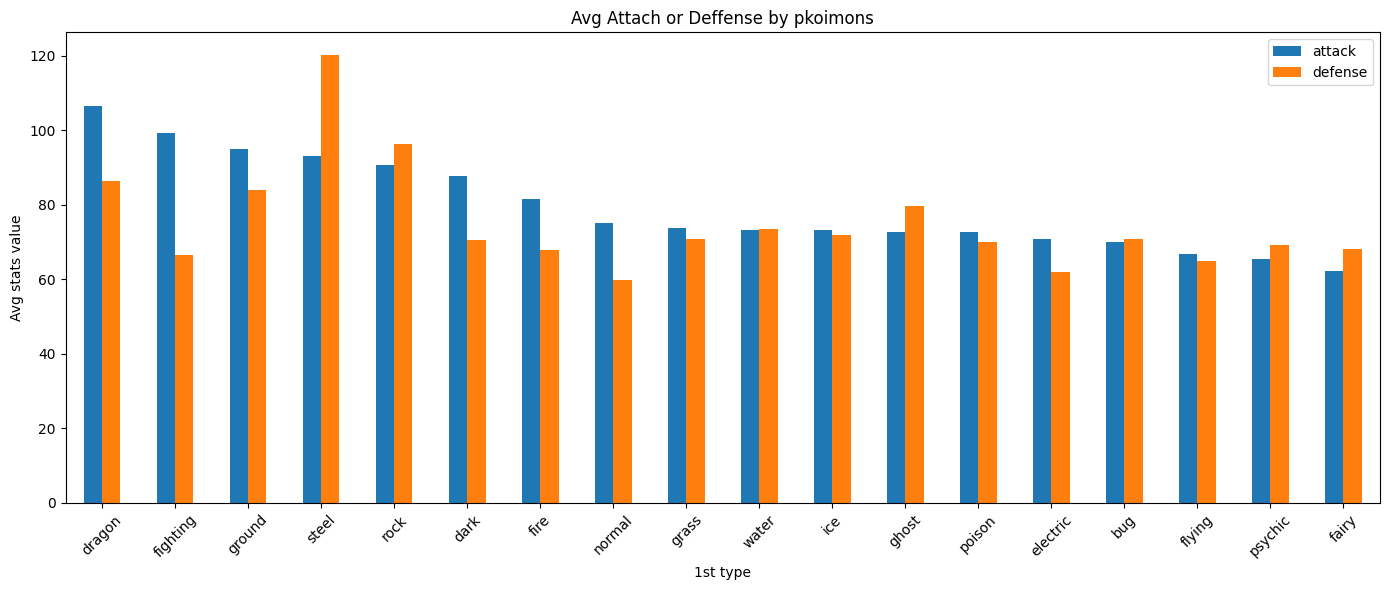

In [ ]:
plt.figure(figsize=(14,6))
off_deff[['attack', 'defense']].plot(kind='bar', figsize=(14,6))
plt.title('Avg Attach or Deffense by pkoimons')
plt.xlabel('1st type')
plt.ylabel('Avg stats value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TASK 2:LEGENDARY TYPE


In [ ]:
df['legendary_status'] = df['is_legendary'].apply(lambda x: 'Legendary' if x == 1 else 'Non-Legendary')

In [ ]:
counts = df.groupby(['type1', 'legendary_status'])['name'].count()

In [ ]:
counts = counts.unstack().fillna(0)  #fill missing with 0

In [ ]:
print(counts)

legendary_status  Legendary  Non-Legendary
type1                                     
bug                     3.0           69.0
dark                    3.0           26.0
dragon                  7.0           20.0
electric                5.0           34.0
fairy                   1.0           17.0
fighting                0.0           28.0
fire                    5.0           47.0
flying                  1.0            2.0
ghost                   1.0           26.0
grass                   4.0           74.0
ground                  2.0           30.0
ice                     2.0           21.0
normal                  3.0          102.0
poison                  0.0           32.0
psychic                17.0           36.0
rock                    4.0           41.0
steel                   6.0           18.0
water                   6.0          108.0


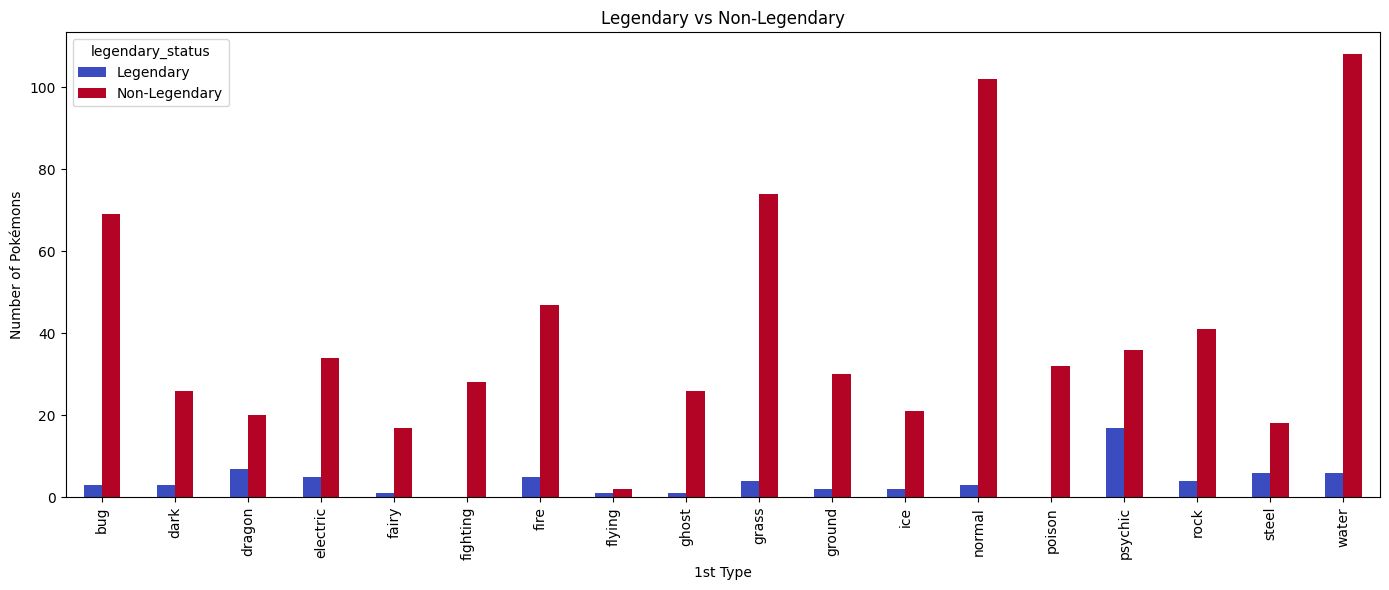

In [ ]:
counts.plot(kind='bar', figsize=(14, 6), colormap='coolwarm')
plt.title('Legendary vs Non-Legendary')
plt.xlabel('1st Type')
plt.ylabel('Number of Pokémons')
plt.tight_layout()
plt.show()

TASK 3:FASTEST FROM TYPE 2


In [ ]:
type2_df = df[df['type2'].notnull()]

In [ ]:
type2_stats = type2_df.groupby('type2').agg({
    'hp': 'mean',
    'speed': 'max',
    'name': 'count'
})

In [ ]:
type2_stats = type2_stats.sort_values(by='speed', ascending=False)

In [ ]:
print(type2_stats)

                 hp  speed  name
type2                           
flying    70.305263    160    95
fighting  78.960000    151    25
poison    61.382353    145    34
dark      70.047619    132    21
fairy     63.034483    130    29
psychic   71.758621    128    29
grass     67.200000    127    20
ice       80.200000    125    15
dragon    85.411765    123    17
fire      70.076923    117    13
steel     67.409091    112    22
ground    75.970588    110    34
ghost     66.642857    110    14
electric  80.333333    110     9
normal    63.500000    109     4
water     60.470588     80    17
bug       53.200000     75     5
rock      69.500000     55    14


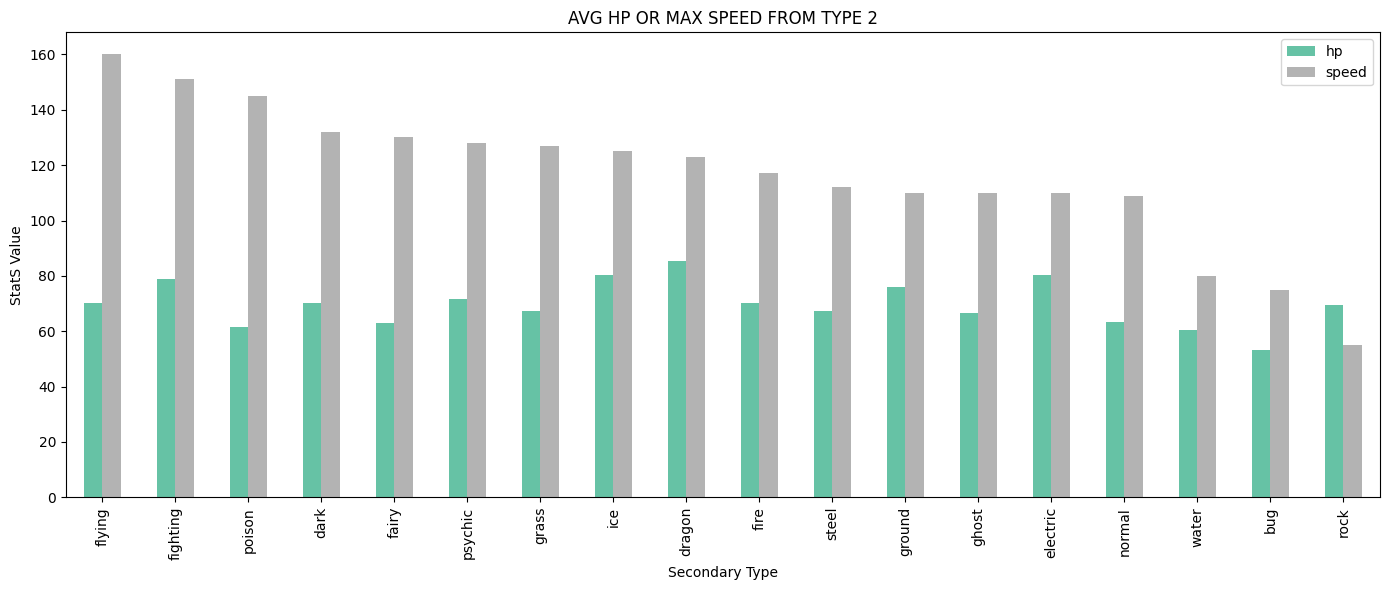

In [ ]:
type2_stats[['hp', 'speed']].plot(kind='bar', figsize=(14,6), colormap='Set2')
plt.title('AVG HP OR MAX SPEED FROM TYPE 2')
plt.xlabel('Secondary Type')
plt.ylabel('StatS Value')
plt.tight_layout()
plt.show()

**Task 4: Custom Focus Based on Strategic Type Needs**

In [ ]:
# Fire type → Average Special Attack
fire_avg_spatk = df[df['type1'] == 'fire']['sp_attack'].mean()


In [ ]:
# Water type → Max Defense
water_max_def = df[df['type1'] == 'water']['defense'].max()

In [ ]:
# Electric type → Min Speed
electric_min_speed = df[df['type1'] == 'electric']['speed'].min()

In [ ]:
# Print strategic stats for these three types
print(f"Fire: Average Special Attack: {fire_avg_spatk:.2f}")
print(f"Water: Max Defense: {water_max_def}")
print(f"Electric: Min Speed: {electric_min_speed}")

Fire: Average Special Attack: 87.73
Water: Max Defense: 180
Electric: Min Speed: 35


In [ ]:

# All other types → Median Attack
other_types = df[~df['type1'].isin(['fire', 'water', 'electric'])]

In [ ]:
# Group by type1 and calculate median attack
other_median_attack = other_types.groupby('type1')['attack'].median()

In [ ]:
# Print median attack for all other types
for t, value in other_median_attack.items():
    print(f"{t}: Median Attack: {value}")

bug: Median Attack: 65.0
dark: Median Attack: 88.0
dragon: Median Attack: 100.0
fairy: Median Attack: 58.5
fighting: Median Attack: 100.0
flying: Median Attack: 70.0
ghost: Median Attack: 66.0
grass: Median Attack: 68.0
ground: Median Attack: 90.0
ice: Median Attack: 65.0
normal: Median Attack: 75.0
poison: Median Attack: 68.5
psychic: Median Attack: 55.0
rock: Median Attack: 89.0
steel: Median Attack: 90.0


**TASK 5: Custom Focus Based on Strategic Type Needs**

In [ ]:
# Group by type1 and generation and calculate average base_total
gen_type_stats = df.groupby(['type1', 'generation'])['base_total'].mean().unstack()

In [ ]:
print(gen_type_stats)

generation           1           2           3           4           5  \
type1                                                                    
bug         352.916667  415.500000  327.166667  360.375000  416.666667   
dark               NaN  458.000000  421.250000  538.333333  417.923077   
dragon      440.000000         NaN  598.571429  470.000000  545.000000   
electric    445.555556  400.000000  420.000000  449.857143  427.857143   
fairy       403.000000  323.600000         NaN  545.000000         NaN   
fighting    412.142857  332.500000  375.250000  455.000000  429.285714   
fire        463.916667  444.125000  446.666667  477.600000  425.875000   
flying             NaN         NaN         NaN         NaN  580.000000   
ghost       438.333333  435.000000  400.000000  505.166667  390.200000   
grass       418.583333  377.000000  400.833333  446.923077  411.733333   
ground      376.875000  420.000000  453.333333  475.000000  428.333333   
ice         517.500000  333.750000  44

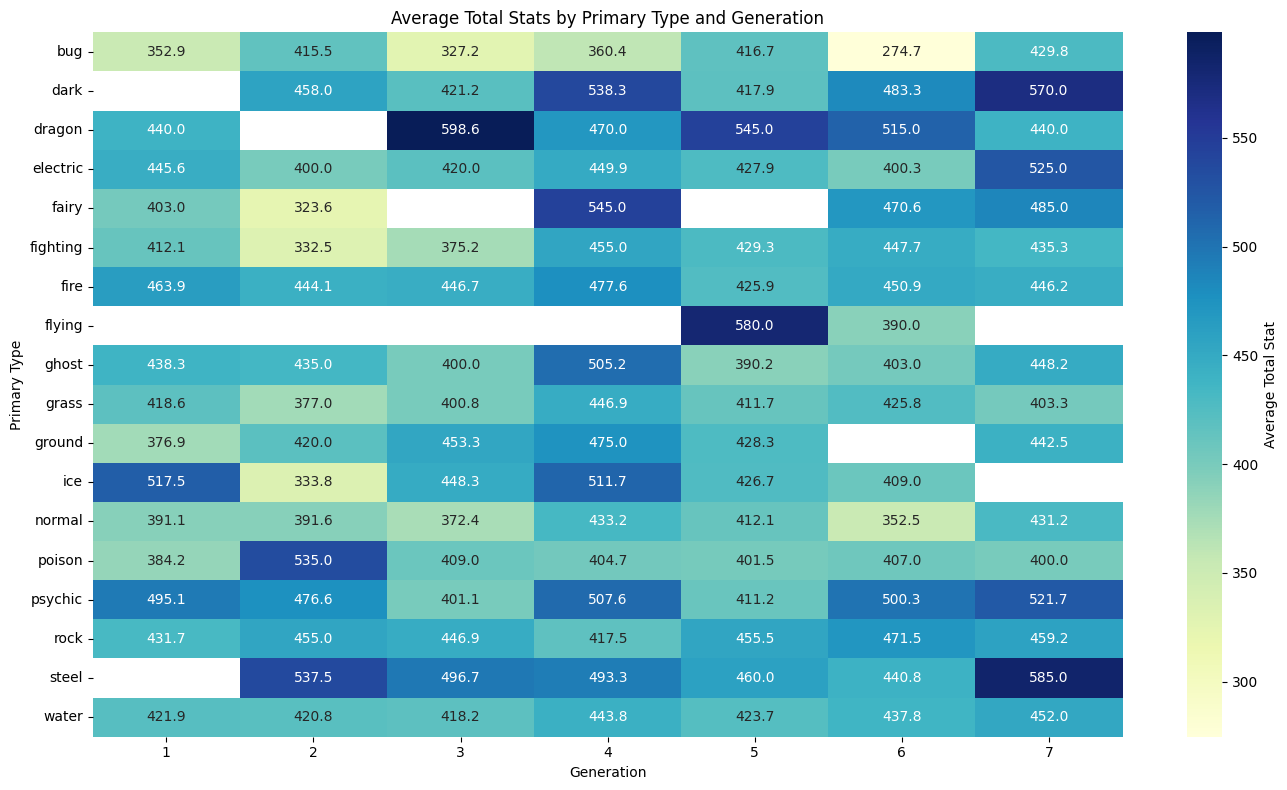

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(gen_type_stats, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Total Stat'})
plt.title('Average Total Stats by Primary Type and Generation')
plt.xlabel('Generation')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()